In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_folder/univAI/Training Data.csv')


In [4]:
train.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


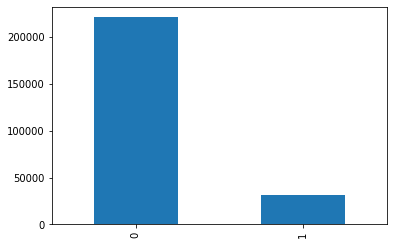

In [5]:
train['risk_flag'].value_counts().plot.bar()

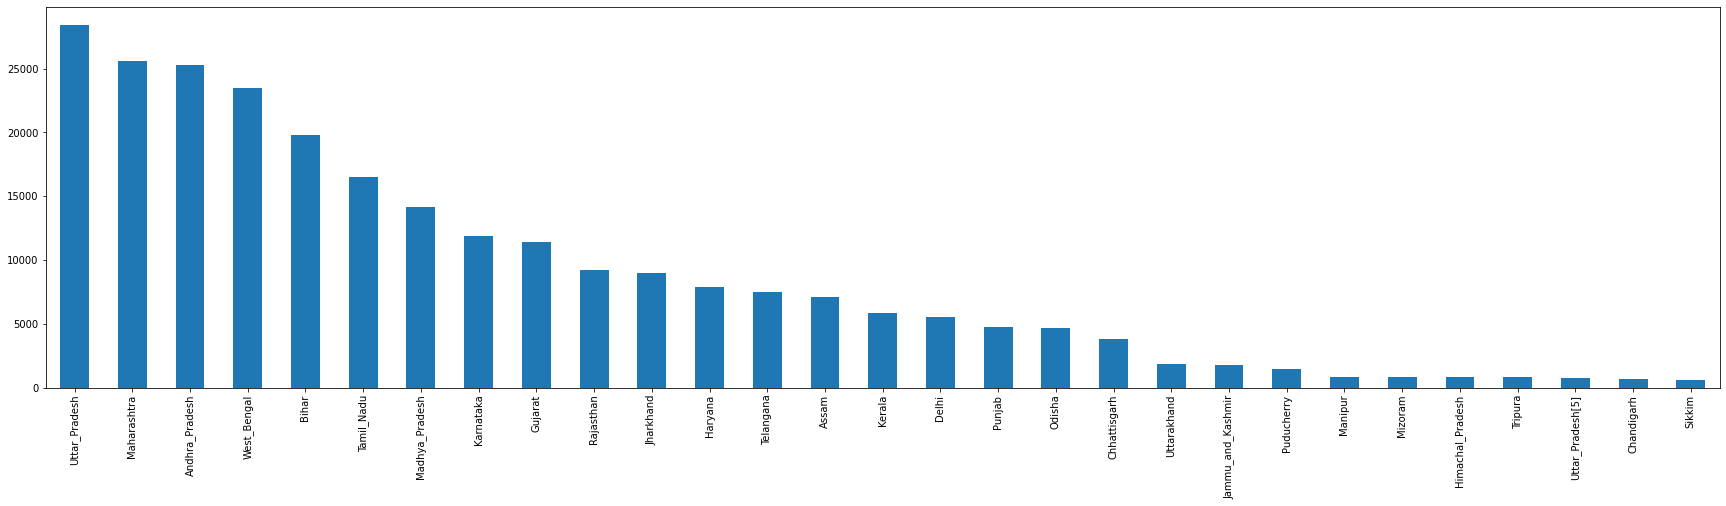

In [6]:
train['state'].value_counts().plot.bar(figsize = (30,7))

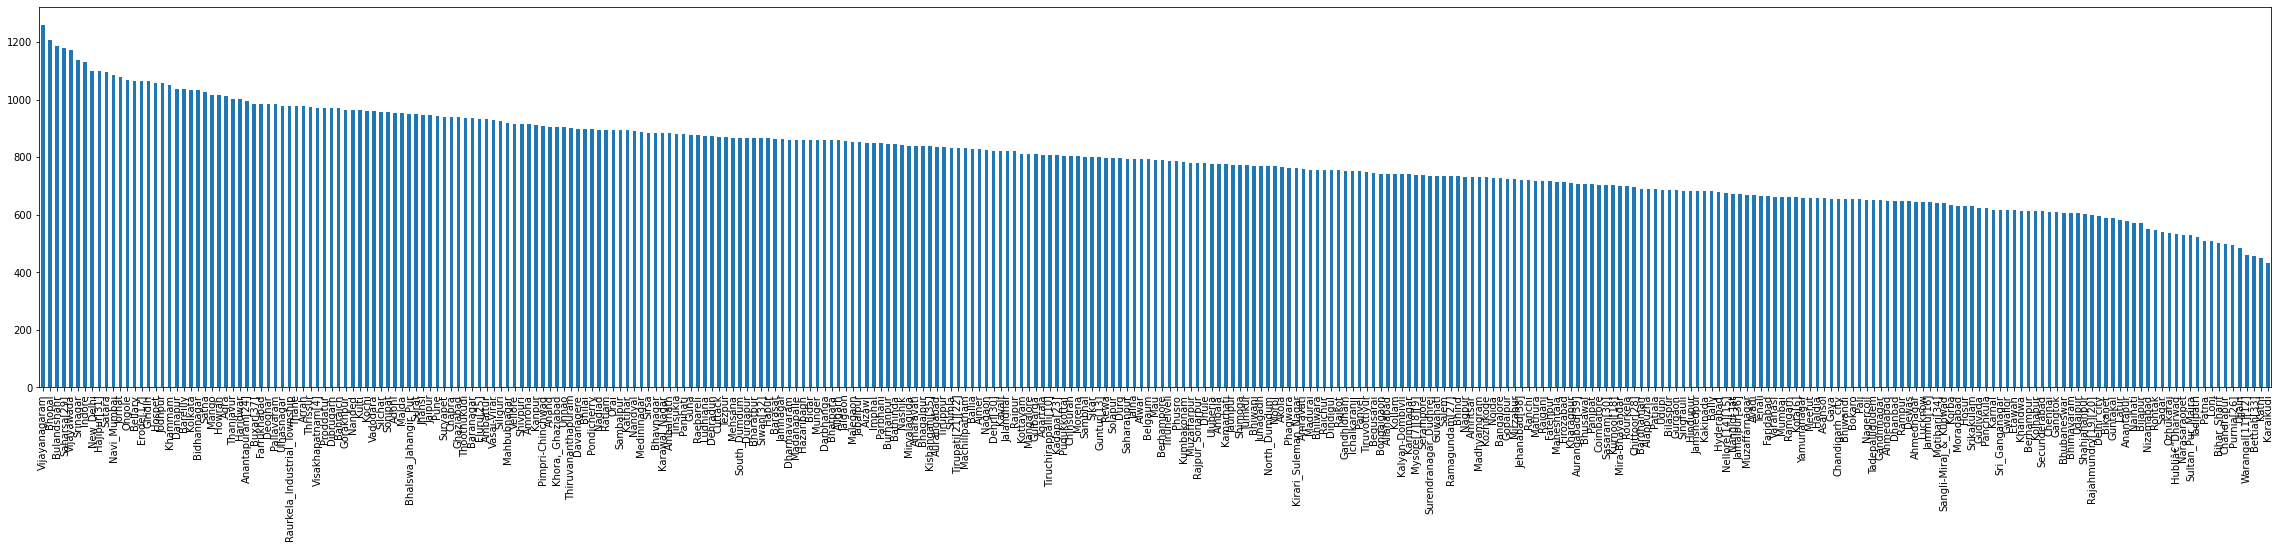

In [7]:
train['city'].value_counts().plot.bar(figsize = (40,7))

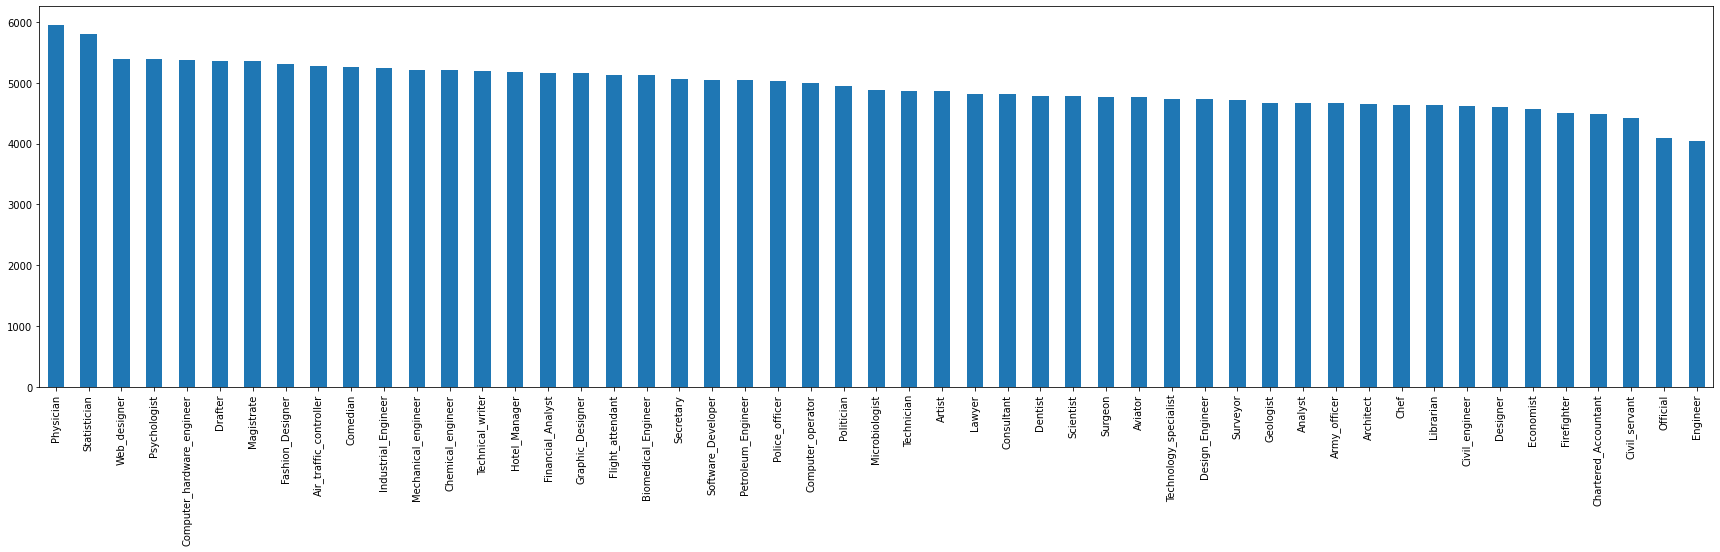

In [8]:
train['profession'].value_counts().plot.bar(figsize = (30,7))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


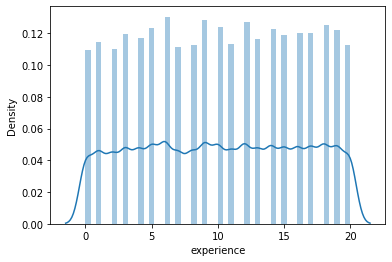

In [9]:
sns.distplot(train.experience)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


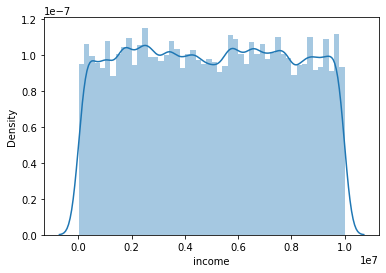

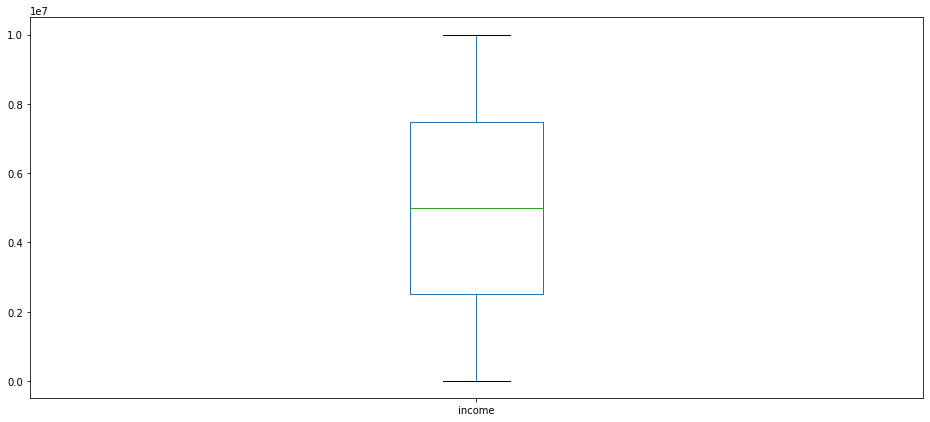

In [10]:
sns.distplot(train.income)
plt.show()
train.income.plot.box(figsize = (16,7))
plt.show()

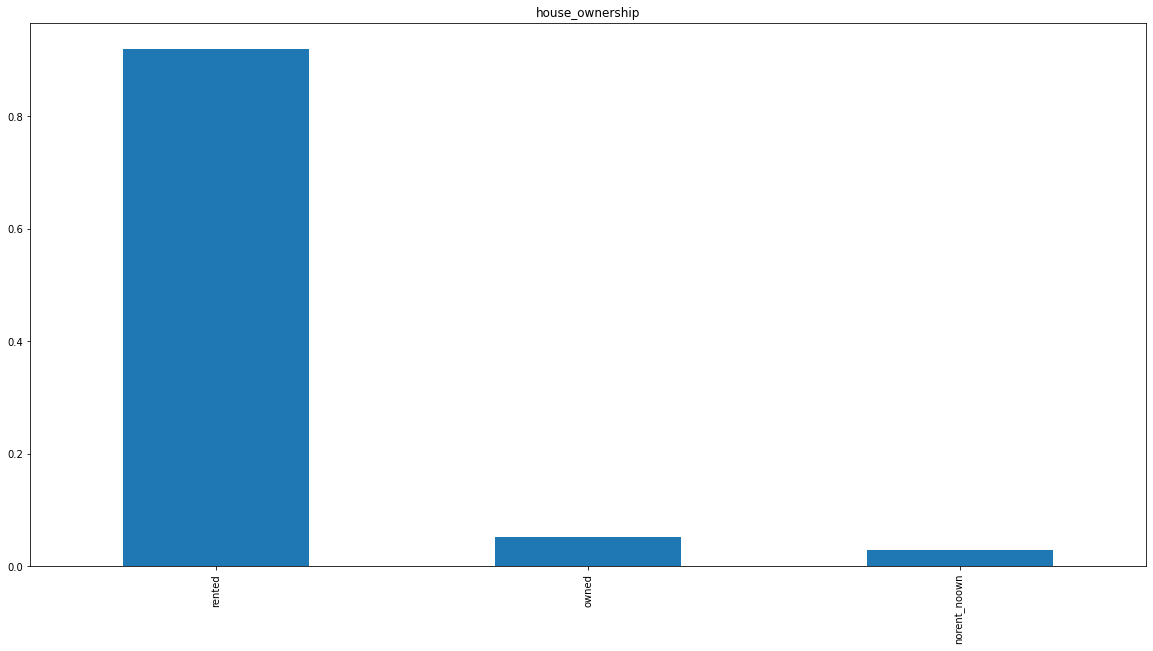

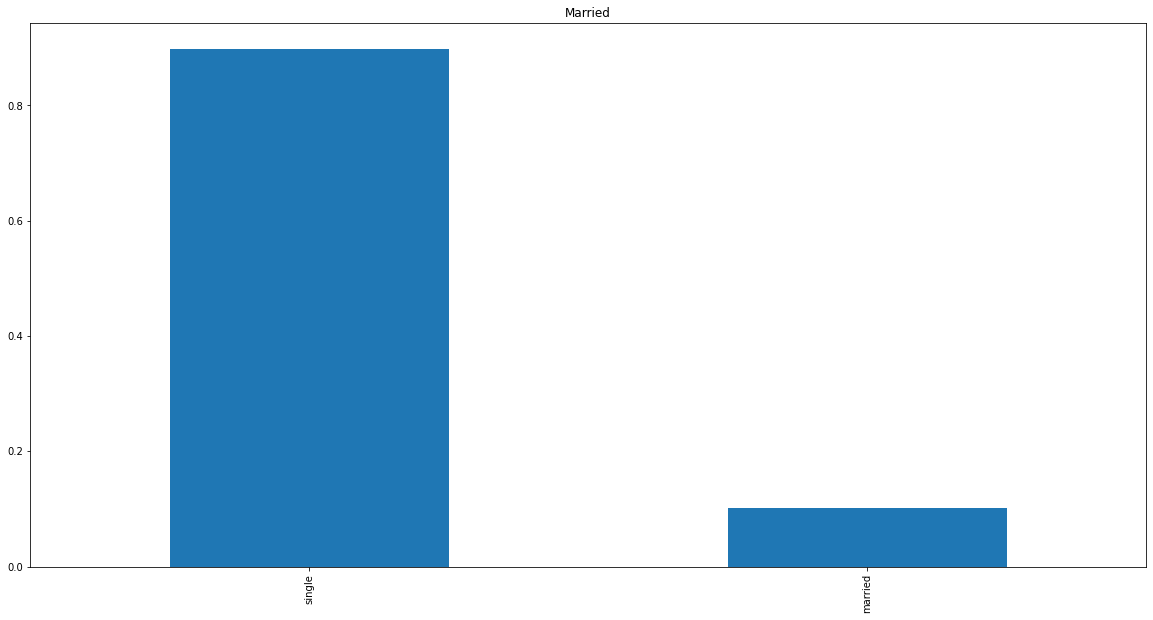

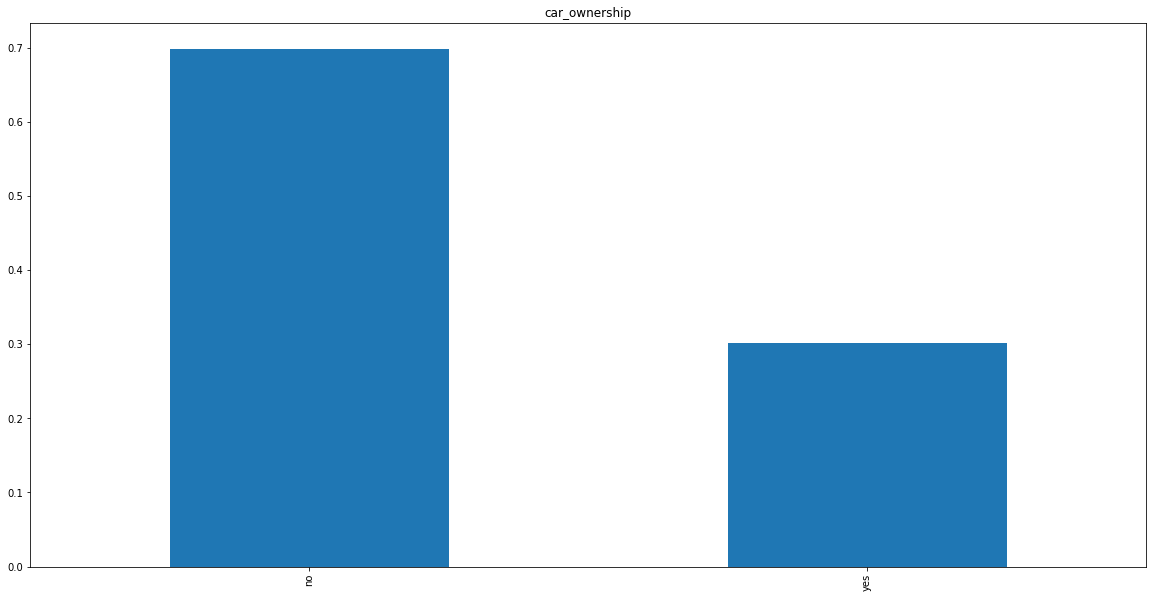

In [11]:
train['house_ownership'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = "house_ownership")
plt.show()
train['married'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = "Married")
plt.show()
train['car_ownership'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = "car_ownership")
plt.show()

In [12]:
train.dtypes

Id                      int64
income                  int64
age                     int64
experience              int64
married                object
house_ownership        object
car_ownership          object
profession             object
city                   object
state                  object
current_job_years       int64
current_house_years     int64
risk_flag               int64
dtype: object

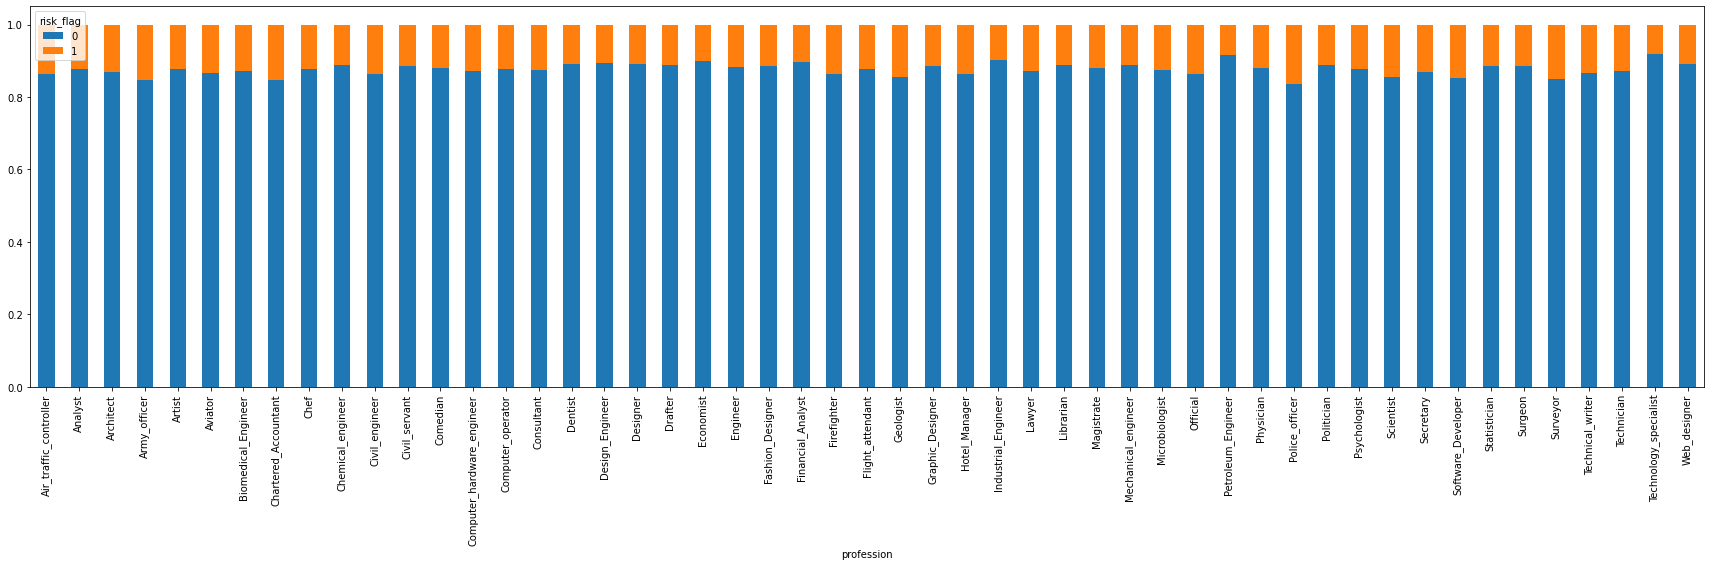

In [13]:
prof = pd.crosstab(train['profession'],train['risk_flag'])
prof.div(prof.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True ,figsize = (30,7))
plt.show()

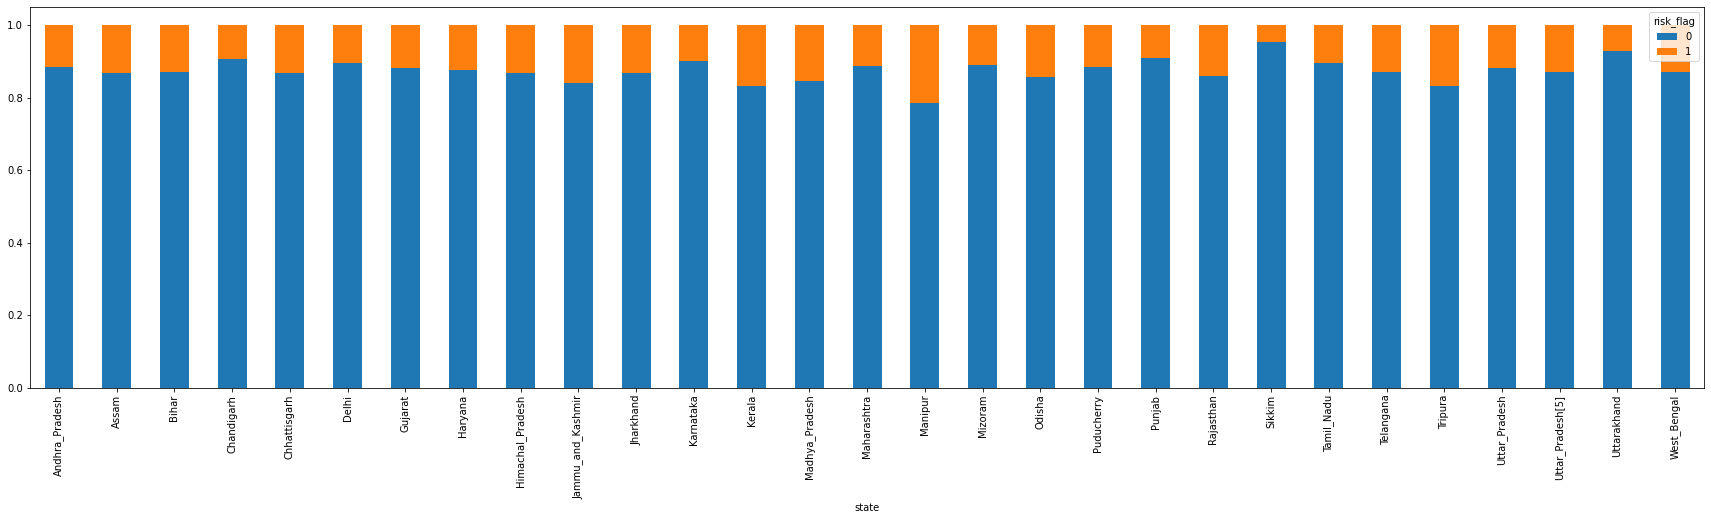

In [14]:
st = pd.crosstab(train['state'],train['risk_flag'])
st.div(st.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True ,figsize = (30,7))
plt.show()

#Basic one hot encoding

In [15]:
train.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [16]:
train.dtypes

Id                      int64
income                  int64
age                     int64
experience              int64
married                object
house_ownership        object
car_ownership          object
profession             object
city                   object
state                  object
current_job_years       int64
current_house_years     int64
risk_flag               int64
dtype: object

In [17]:
train_one_hot = pd.get_dummies(train)

In [35]:
train_one_hot

,Id,income,age,experience,current_job_years,current_house_years,risk_flag,married_married,married_single,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,car_ownership_no,car_ownership_yes,profession_Air_traffic_controller,profession_Analyst,profession_Architect,profession_Army_officer,profession_Artist,profession_Aviator,profession_Biomedical_Engineer,profession_Chartered_Accountant,profession_Chef,profession_Chemical_engineer,profession_Civil_engineer,profession_Civil_servant,profession_Comedian,profession_Computer_hardware_engineer,profession_Computer_operator,profession_Consultant,profession_Dentist,profession_Design_Engineer,profession_Designer,profession_Drafter,profession_Economist,profession_Engineer,profession_Fashion_Designer,profession_Financial_Analyst,profession_Firefighter,profession_Flight_attendant,...,city_Uluberia,city_Unnao,city_Vadodara,city_Varanasi,city_Vasai-Virar,city_Vellore,city_Vijayanagaram,city_Vijayawada,city_Visakhapatnam[4],city_Warangal[11][12],city_Yamunanagar,state_Andhra_Pradesh,state_Assam,state_Bihar,state_Chandigarh,state_Chhattisgarh,state_Delhi,state_Gujarat,state_Haryana,state_Himachal_Pradesh,state_Jammu_and_Kashmir,state_Jharkhand,state_Karnataka,state_Kerala,state_Madhya_Pradesh,state_Maharashtra,state_Manipur,state_Mizoram,state_Odisha,state_Puducherry,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil_Nadu,state_Telangana,state_Tripura,state_Uttar_Pradesh,state_Uttar_Pradesh[5],state_Uttarakhand,state_West_Bengal
0,1,1303835,23,3,3,13,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,7574516,40,10,9,13,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,3991815,66,4,4,10,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,6256451,41,2,2,12,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,5,5768871,47,11,3,14,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,6,11,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
251996,251997,2843572,26,10,6,11,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
251997,251998,4522448,46,7,7,12,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
251998,251999,6507128,45,0,0,10,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
one_hot_y = train_one_hot['risk_flag']
one_hot_x = train_one_hot.drop(['risk_flag'],axis=1)

In [20]:
train_one_hot_x,test_one_hot_x,train_one_hot_y,test_one_hot_y = train_test_split(one_hot_x, one_hot_y, test_size=0.33, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
random_classifier_model = RandomForestClassifier()
random_classifier_model.fit(train_one_hot_x,train_one_hot_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
test_one_hot_pred = random_classifier_model.predict(test_one_hot_x)

In [23]:
from sklearn.metrics import f1_score

In [24]:
print(f1_score(test_one_hot_y, test_one_hot_pred, average='macro'))
print(f1_score(test_one_hot_y, test_one_hot_pred, average='micro'))
print(f1_score(test_one_hot_y, test_one_hot_pred, average='weighted'))

0.7383259796007975
0.9008898508898509
0.8941736063676717


In [25]:
 from sklearn.metrics import confusion_matrix
 confusion_matrix(test_one_hot_y,test_one_hot_pred)

array([[70232,  2767],
       [ 5475,  4686]])

In [26]:
from sklearn.metrics import roc_auc_score

In [27]:
roc_auc_score(test_one_hot_y, random_classifier_model.predict_proba(test_one_hot_x)[:, 1])

0.9141772226802718

In [28]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV

In [31]:
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_folder/univAI/Test Data.csv')

In [33]:
test_one_hot = pd.get_dummies(test_data)

In [36]:
sol = random_classifier_model.predict(test_one_hot)

In [40]:
ans = []
for i in range(len(sol)):
    ans.append([i+1,sol[i]])

In [42]:
df = pd.DataFrame(ans, columns = ['id', 'risk_flag'])

In [43]:
df.to_csv('sub_file.csv')

In [29]:
import xgboost as xgb

param = {}
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param["eval_metric"] = "error"
param['eta'] = 0.3
param['gamma'] = 0
param['max_depth'] = 6
param['min_child_weight']=1
param['max_delta_step'] = 0
param['subsample']= 1
param['colsample_bytree']=1
param['silent'] = 1
param['seed'] = 0
param['base_score'] = 0.5

xgb_model = xgb.XGBClassifier(param)
xgb_model=CalibratedClassifierCV(xgb_model, method='isotonic', cv=2)
xgb_model.fit(train_one_hot_x, train_one_hot_y)
testPredictions = xgb_model.predict(test_one_hot_y)
roc_auc_score(test_one_hot_y, xgb_model.predict_proba(test_one_hot_x)[:, 1])

XGBoostError: ignored